In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import datetime
import geopandas
import random
import math
import matplotlib

In [3]:
print("GTFS data sets: ")
GTFS_DATA_PATH = "mmt_gtfs/"
#import os; os.listdir(GTFS_DATA_PATH) # Peak whats in the directory 

GTFS data sets: 


In [4]:
def getPandasDFCSV(path, file, sep=','):  
    """ Keyword Arg sep: deliminator used in txt file (default = ',')"""
    pandasDF = pd.read_csv(path +  file, sep=sep)
    return pandasDF

In [5]:
stop_times_df = getPandasDFCSV(GTFS_DATA_PATH, 'stop_times.txt')
#stop_times_df.info()
#stop_times_df.head(3)

In [6]:
# Fix the times from strings and bad formatting to datetime objects:

arrivalTimesArray = np.array(stop_times_df['arrival_time'])

arrivalTimesArrayFixed = []
for time in arrivalTimesArray:
    timeList = time.split(":")
    timeList = [int(time) for time in timeList]
    if timeList[0] < 24:
        dateTime = datetime.datetime(2000, 1, 1, timeList[0], timeList[1], timeList[2])
    else:
        dateTime = datetime.datetime(2000, 1, 2, timeList[0]-24, timeList[1], timeList[2])
    arrivalTimesArrayFixed.append(dateTime)
    
stop_times_df['arrival_time'] = arrivalTimesArrayFixed

departureTimesArray = np.array(stop_times_df['departure_time'])

departureTimesArrayFixed = []
for time in departureTimesArray:
    timeList = time.split(":")
    timeList = [int(time) for time in timeList]
    if timeList[0] < 24:
        dateTime = datetime.datetime(2000, 1, 1, timeList[0], timeList[1], timeList[2])
    else:
        dateTime = datetime.datetime(2000, 1, 2, timeList[0]-24, timeList[1], timeList[2])
    departureTimesArrayFixed.append(dateTime)
    
stop_times_df['departure_time'] = departureTimesArrayFixed

#stop_times_df.head(3)

In [7]:
#stop_times_df.head(3)

In [8]:
trips_df = getPandasDFCSV(GTFS_DATA_PATH, 'trips.txt')
#trips_df.info()
#trips_df.head(3)

In [9]:
stops_df = getPandasDFCSV(GTFS_DATA_PATH, 'stops.txt')
#stops_df.info()
#stops_df.head(3)

In [10]:
print("list of possible trips: \n")

service_id_list = []
for i in trips_df['service_id']:
    if i not in service_id_list:
        service_id_list.append(i)
print(service_id_list)

list of possible trips: 

['92_WKD', '92_SAT', '92_SUN', '92_HOL', '92_MWK', '92_WKD:R', '92_SAT:R', '92_SUN:R', '92_HOL:R', '92_SAT:L', '92_SUN:L', '92_WKD:L#6', '92_WKD:L=6', '92_WKD:S', '92_SAT:S', '92_SUN:S', '92_WKD:S#6', '92_WKD:S=6']


In [11]:
print("list of possible routes: \n")

route_short_name_list = []
for i in trips_df['route_short_name']:
    if i not in route_short_name_list:
        route_short_name_list.append(i)

route_short_name_list.sort()
print(route_short_name_list)

list of possible routes: 

[2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 30, 31, 32, 33, 36, 39, 40, 44, 48, 49, 50, 51, 52, 55, 59, 63, 67, 68, 70, 72, 73, 75, 78, 80, 81, 82, 84]


In [12]:
trips_df_weekday_peak = trips_df[trips_df['service_id'] == '92_WKD']
trips_df_weekday_peak_R = trips_df[trips_df['service_id'] == '92_WKD:R']
trips_df_weekday_peak_s = trips_df[trips_df['service_id'] == '92_WKD:L#6']
trips_df_weekday_peak_s3 = trips_df[trips_df['service_id'] == '92_WKD:L=6']
trips_df_weekday_peak_s1 = trips_df[trips_df['service_id'] == '92_WKD:S']
trips_df_weekday_peak_s2 = trips_df[trips_df['service_id'] == '92_WKD:S#6']
trips_df_weekday_peak_s4 = trips_df[trips_df['service_id'] == '92_WKD:S=6']

dfs_wk = [trips_df_weekday_peak, trips_df_weekday_peak_R, trips_df_weekday_peak_s, 
          trips_df_weekday_peak_s1, trips_df_weekday_peak_s2, trips_df_weekday_peak_s4]

trips_df_weekday = pd.concat(dfs_wk)
#trips_df_weekday.info()

In [13]:
print("Routes for weekday trips: \n")

routes_wk_list = []
for route in trips_df_weekday['route_short_name']:
    if route not in routes_wk_list:
        routes_wk_list.append(route)

routes_wk_list.sort()
print(routes_wk_list)

Routes for weekday trips: 

[2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 30, 31, 32, 33, 36, 39, 40, 44, 48, 49, 50, 51, 52, 55, 67, 70, 72, 73, 75, 80, 81, 82, 84]


In [14]:
# make a dictionary of routes with trip ID's for weekday service:
print("Dictionary of all the possible trips for each route during weekdays: \n\n Example output for 10 trips in route 2: \n")

tripIDList_forRoutes_weekday92 = dict()
for i in routes_wk_list:
    trip_list = []
    for j in trips_df_weekday[trips_df_weekday['route_short_name'] == i].iterrows():
        trip_list.append(j[1]['trip_id'])
    tripIDList_forRoutes_weekday92[i] = trip_list

print(tripIDList_forRoutes_weekday92[10][:10])

Dictionary of all the possible trips for each route during weekdays: 

 Example output for 10 trips in route 2: 

[1009351, 1009352, 1009353, 1009366, 1009367, 1009368, 1009369, 1009362, 1009363, 1009364]


In [15]:
trips_df[trips_df['trip_id'] == 985237]

,route_id,route_short_name,service_id,trip_id,trip_headsign,direction_id,direction_name,block_id,shape_id,shape_code,trip_type,trip_sort,wheelchair_accessible,bikes_allowed
485,9036,11,92_WKD,985237,U.W. CAMPUS-DUTCH MILL,0,Dutch Mill,194441,55241,11E,W,23400,1,1


In [16]:
#stop_times_df[stop_times_df['trip_id']==985237]

In [17]:
hours = [i for i in range(24)]

In [18]:
route_freq_all = dict()
for route in routes_wk_list:
    if route == 80:
        continue
    route_frequency = dict()
    for timeHour in range(24):
        directionRef = -999
        for trip in tripIDList_forRoutes_weekday92[route]:
            midpoint = int(len(stop_times_df[stop_times_df['trip_id']==trip])/2)
            localDF = stop_times_df[stop_times_df['trip_id']==trip]
            time = localDF.loc[localDF['stop_sequence']==midpoint, 'arrival_time'].item()
            hour = time.hour
            direction = trips_df.loc[trips_df['trip_id']==trip, 'direction_id'].item()
            if directionRef == -999 and timeHour == hour:
                directionRef = direction
            if timeHour == hour and direction == directionRef:
                if hour not in route_frequency:
                    route_frequency[hour] = 1
                else:
                    route_frequency[hour] += 1
    route_freq_all[route] = route_frequency
        
#route_freq_all

In [19]:
print(route_freq_all)

{2: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 4: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 5: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 6: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 3, 23: 1}, 7: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 8: {7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 10: {6: 1, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 2}, 11: {6: 1, 7: 1, 8: 1, 9: 1, 15: 2, 16: 1, 17: 1}, 12: {6: 1, 7: 1, 8: 1, 9: 1, 14: 1, 15: 1, 16: 1, 17: 1}, 13: {5: 1, 6: 1, 7: 1, 8: 1, 9: 

In [20]:
routes_wk_list_no80 = [i for i in routes_wk_list if i != 80]

m = [[0]*24 for i in range(len(routes_wk_list_no80))]
w = [[0]*(len(routes_wk_list_no80)) for i in range(24)]
for i, route in enumerate(routes_wk_list_no80):
    if route == 80:
        continue
    #print("i ", i, " route ", route)
    for j in range(24):
        if j in route_freq_all[route]:
            m[i][j] = route_freq_all[route][j]
            w[j][i] = route_freq_all[route][j]
    #print(m[i])
    #print()

<ipython-input-21-127f08f6e7b9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(routes_wk_list_no80))
<ipython-input-21-127f08f6e7b9>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["12am", "2am", "4am", "6am", "8am", "10am", "12pm", "2pm", "4pm", "6pm", "8pm", "10pm"])
<ipython-input-21-127f08f6e7b9>:14: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(ax=ax, pad=.01, cmap=cmap, ticks=[(5/12), 3*(5/12), 5*(5/12), 7*(5/12), 9*(5/12), 11*(5/12)])


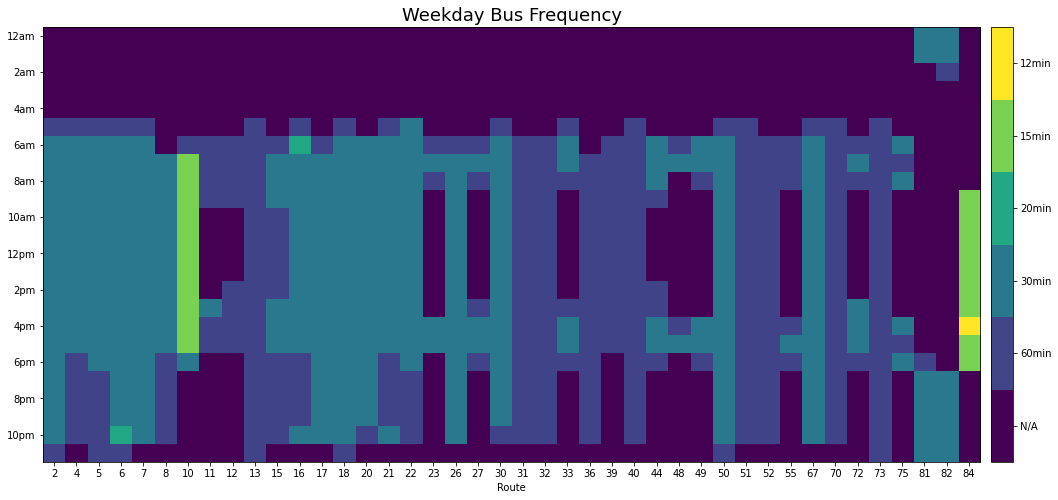

In [21]:
ax = plt.subplots(figsize=(20, 8))[1]

cmap = matplotlib.cm.get_cmap("viridis", 6)

plt.imshow(w, cmap=cmap, interpolation='nearest', aspect='auto')

ax.set_xticklabels(list(routes_wk_list_no80))
ax.set_xticks(range(0, len(routes_wk_list_no80)))

ax.set_yticklabels(["12am", "2am", "4am", "6am", "8am", "10am", "12pm", "2pm", "4pm", "6pm", "8pm", "10pm"])
ax.set_yticks(range(0, 24, 2))

colorbarTicks=["N/A", "60min", "30min", "20min", "15min", "12min"]
cbar = plt.colorbar(ax=ax, pad=.01, cmap=cmap, ticks=[(5/12), 3*(5/12), 5*(5/12), 7*(5/12), 9*(5/12), 11*(5/12)])
#cbar.set_label('Bus Frequency', fontsize=16)
cbar.ax.set_yticklabels(colorbarTicks)

plt.title("Weekday Bus Frequency", fontsize=18)
plt.xlabel("Route")
plt.savefig('PaperFigures/FrequencyHeatMap', bbox_inches='tight')
plt.show()